# Road Ratio EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import os
import cv2

import seaborn as sns
from IPython.display import Image

## CSV 파일 불러오기

In [ ]:
train_road_df = pd.read_csv('/content/drive/MyDrive/SharedData/eda/road_area.csv')

In [ ]:
train_road_df.head(5)

Unnamed: 0                     file_name  count_0  count_1  count_total  \
0           0  BLD00001_PS3_K3A_NIA0276.txt   840517   208059      1048576   
1           1  BLD00003_PS3_K3A_NIA0276.txt   861695   186881      1048576   
2           2  BLD00006_PS3_K3A_NIA0276.txt   875486   173090      1048576   
3           3  BLD00007_PS3_K3A_NIA0276.txt   795396   253180      1048576   
4           4  BLD00009_PS3_K3A_NIA0276.txt   892598   155978      1048576   

   Road Ratio(%)  
0      19.842053  
1      17.822361  
2      16.507149  
3      24.145126  
4      14.875221

In [ ]:
train_road_df.shape

(1144, 6)

In [ ]:
a = train_road_df['Road Ratio(%)'].sum()
b = a/1144
print(b)

10.6367188736014


In [ ]:
# columns 확인
train_road_df.columns

Index(['Unnamed: 0', 'file_name', 'count_0', 'count_1', 'count_total',
       'Road Ratio(%)'],
      dtype='object')

In [ ]:
# null 값 확인
train_road_df.isnull().sum()

Unnamed: 0       0
file_name        0
count_0          0
count_1          0
count_total      0
Road Ratio(%)    0
dtype: int64

In [ ]:
# 데이터 타입 확인
train_road_df.dtypes

Unnamed: 0         int64
file_name         object
count_0            int64
count_1            int64
count_total        int64
Road Ratio(%)    float64
dtype: object

## 불필요 컬럼 제거
- `count_0`, `count_1`, `count_total`

In [ ]:
df_train = train_road_df[['file_name', 'Road Ratio(%)']]

## 데이터 정렬 (내림차순)
- 도로 면적이 가장 큰 이미지(전체 36.67% 차지) 확인


In [ ]:
df_train_des = df_train.sort_values(by = ['Road Ratio(%)'], ascending=False).reset_index(drop=True)

In [ ]:
df_train_des.head(5)

file_name  Road Ratio(%)
0  BLD11258_PS3_K3A_NIA0390.txt      36.666393
1  BLD00723_PS3_K3A_NIA0277.txt      32.280254
2  BLD06880_PS3_K3A_NIA0382.txt      32.114029
3  BLD00070_PS3_K3A_NIA0276.txt      31.842709
4  BLD10411_PS3_K3A_NIA0388.txt      31.096744

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD11258_PS3_K3A_NIA0390.png')

Output hidden; open in https://colab.research.google.com to view.

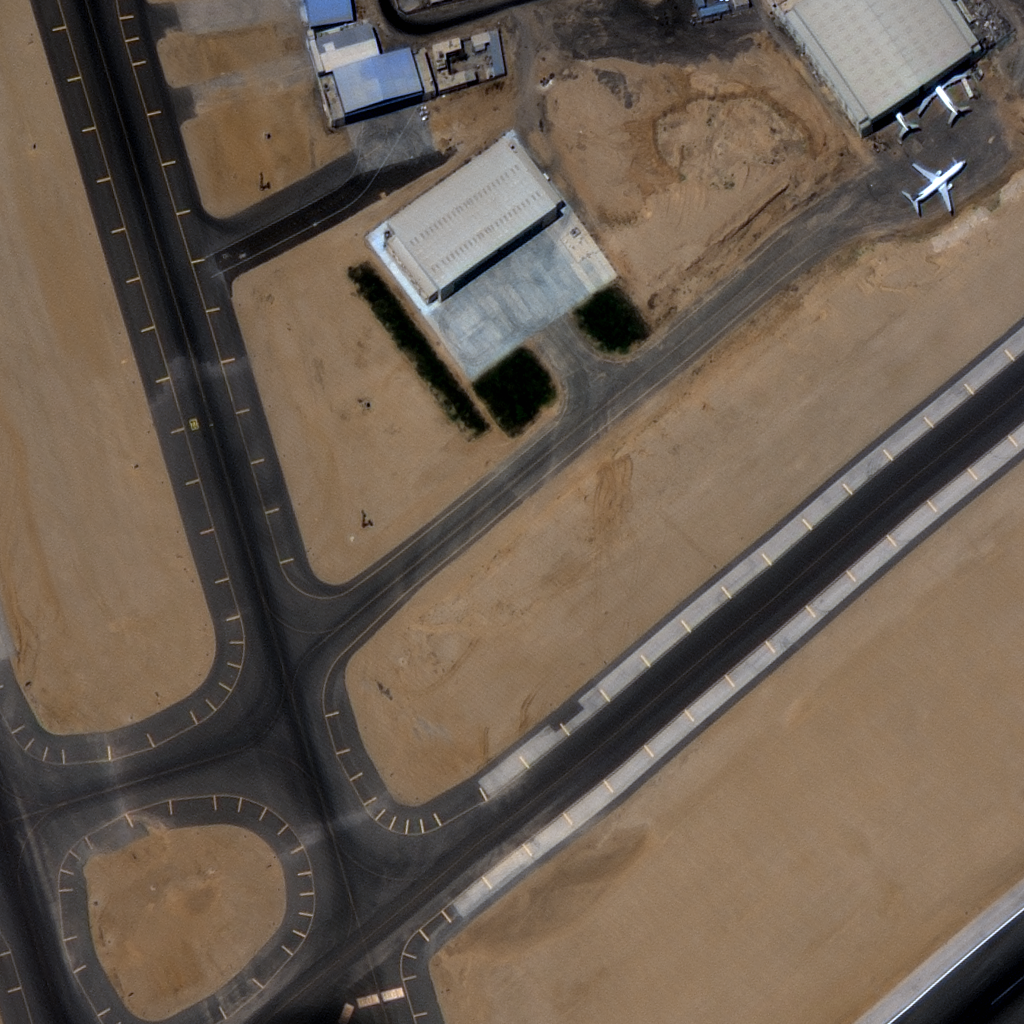

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD00723_PS3_K3A_NIA0277.png')

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD06880_PS3_K3A_NIA0382.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD00070_PS3_K3A_NIA0276.png')

Output hidden; open in https://colab.research.google.com to view.

## 데이터 정렬 (오름차순)
- 도로 면적 0 인 이미지 : 59개

In [ ]:
df_train_asd = df_train.sort_values(by = ['Road Ratio(%)']).reset_index(drop=True)

In [ ]:
df_train_asd.head(63)

file_name  Road Ratio(%)
0   BLD00749_PS3_K3A_NIA0277.txt       0.000000
1   BLD02810_PS3_K3A_NIA0375.txt       0.000000
2   BLD02983_PS3_K3A_NIA0375.txt       0.000000
3   BLD02988_PS3_K3A_NIA0375.txt       0.000000
4   BLD02758_PS3_K3A_NIA0375.txt       0.000000
..                           ...            ...
58  BLD00974_PS3_K3A_NIA0277.txt       0.000000
59  BLD00876_PS3_K3A_NIA0277.txt       0.067520
60  BLD00355_PS3_K3A_NIA0276.txt       0.115585
61  BLD00187_PS3_K3A_NIA0276.txt       0.124454
62  BLD01293_PS3_K3A_NIA0373.txt       0.159836

[63 rows x 2 columns]

In [ ]:
count_zero = df_train_asd[df_train_asd['Road Ratio(%)'] == 0]
count_zero.count()

file_name        59
Road Ratio(%)    59
dtype: int64

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD00876_PS3_K3A_NIA0277.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD00355_PS3_K3A_NIA0276.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD00187_PS3_K3A_NIA0276.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD01293_PS3_K3A_NIA0373.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Histogram(x=df_train['Road Ratio(%)'], nbinsx=60)])
fig.update_traces(marker=dict(color='cornsilk', line=dict(color='#000000', width=1.5)))
fig.update_layout(title_text="Histogram of Road Ratio",
                  xaxis_title_text='Road ratio(%)', # xaxis label
                  yaxis_title_text='count')
fig.show()

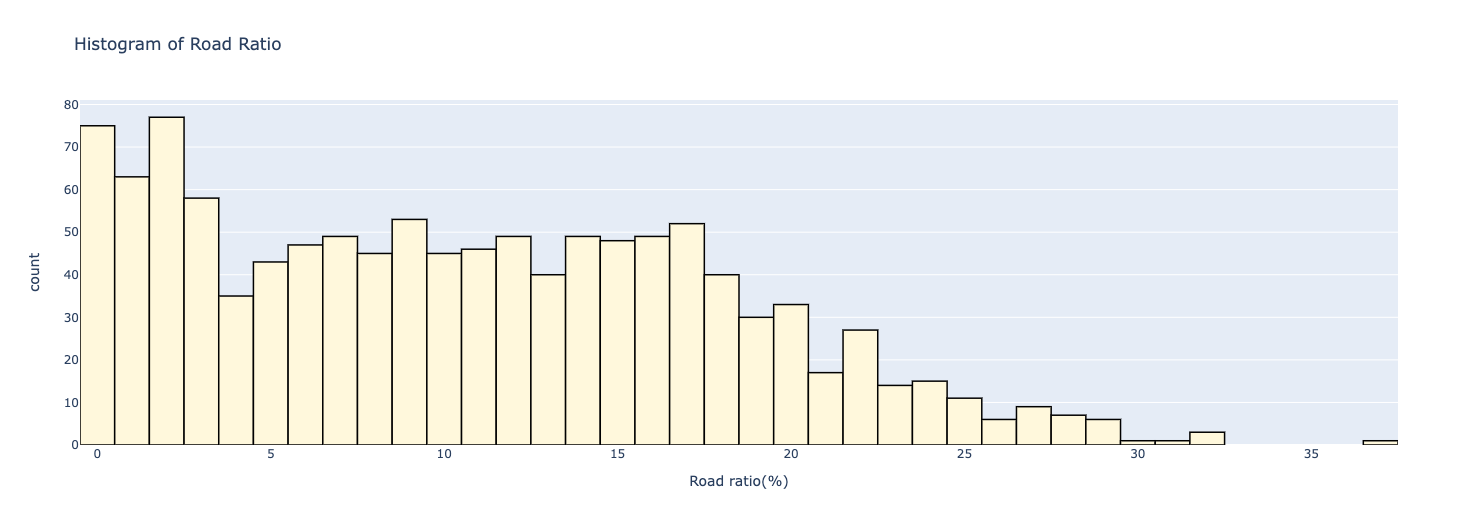

## 도로 면적 이미지 수 count (3% 이하)
- 이하 : 247개
- 이상 : 897개

In [ ]:
count_3 = df_train_des[df_train_des['Road Ratio(%)'] < 3.00]
count_3

file_name  Road Ratio(%)
897   BLD07897_PS3_K3A_NIA0383.txt           2.99
898   BLD00992_PS3_K3A_NIA0277.txt           2.96
899   BLD03363_PS3_K3A_NIA0376.txt           2.95
900   BLD00024_PS3_K3A_NIA0276.txt           2.93
901   BLD00991_PS3_K3A_NIA0277.txt           2.92
...                            ...            ...
1139  BLD02594_PS3_K3A_NIA0375.txt           0.00
1140  BLD00452_PS3_K3A_NIA0276.txt           0.00
1141  BLD00453_PS3_K3A_NIA0276.txt           0.00
1142  BLD02483_PS3_K3A_NIA0375.txt           0.00
1143  BLD00115_PS3_K3A_NIA0276.txt           0.00

[247 rows x 2 columns]

In [ ]:
# 3% 이하 cut
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD07897_PS3_K3A_NIA0383.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
count_97 = df_train_des[df_train_des['Road Ratio(%)'] >= 3.00]
count_97

file_name  Road Ratio(%)
0    BLD11258_PS3_K3A_NIA0390.txt          36.67
1    BLD00723_PS3_K3A_NIA0277.txt          32.28
2    BLD06880_PS3_K3A_NIA0382.txt          32.11
3    BLD00070_PS3_K3A_NIA0276.txt          31.84
4    BLD10411_PS3_K3A_NIA0388.txt          31.10
..                            ...            ...
892  BLD02976_PS3_K3A_NIA0375.txt           3.14
893  BLD02174_PS3_K3A_NIA0374.txt           3.11
894  BLD09990_PS3_K3A_NIA0387.txt           3.08
895  BLD01278_PS3_K3A_NIA0373.txt           3.07
896  BLD01655_PS3_K3A_NIA0373.txt           3.02

[897 rows x 2 columns]

In [ ]:
# csv파일로 저장
count_97.to_csv('/content/drive/MyDrive/SharedData/eda/road_ratio_97.csv', mode='w')

## 도료 면적 이미지 수 count (6% 이하)
- 미만 : 368개
- 이상 : 776개

In [ ]:
count_6 = df_train_des[df_train_des['Road Ratio(%)'] < 6.00]
count_6

file_name  Road Ratio(%)
776   BLD02315_PS3_K3A_NIA0374.txt           5.99
777   BLD01390_PS3_K3A_NIA0373.txt           5.98
778   BLD01295_PS3_K3A_NIA0373.txt           5.98
779   BLD02434_PS3_K3A_NIA0375.txt           5.96
780   BLD02070_PS3_K3A_NIA0374.txt           5.96
...                            ...            ...
1139  BLD02594_PS3_K3A_NIA0375.txt           0.00
1140  BLD00452_PS3_K3A_NIA0276.txt           0.00
1141  BLD00453_PS3_K3A_NIA0276.txt           0.00
1142  BLD02483_PS3_K3A_NIA0375.txt           0.00
1143  BLD00115_PS3_K3A_NIA0276.txt           0.00

[368 rows x 2 columns]

In [ ]:
# 6% 이하 cut
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD02315_PS3_K3A_NIA0374.png')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
count_94 = df_train_des[df_train_des['Road Ratio(%)'] >= 6.00]
count_94

file_name  Road Ratio(%)
0    BLD11258_PS3_K3A_NIA0390.txt          36.67
1    BLD00723_PS3_K3A_NIA0277.txt          32.28
2    BLD06880_PS3_K3A_NIA0382.txt          32.11
3    BLD00070_PS3_K3A_NIA0276.txt          31.84
4    BLD10411_PS3_K3A_NIA0388.txt          31.10
..                            ...            ...
771  BLD08114_PS3_K3A_NIA0384.txt           6.05
772  BLD01336_PS3_K3A_NIA0373.txt           6.04
773  BLD00136_PS3_K3A_NIA0276.txt           6.03
774  BLD02323_PS3_K3A_NIA0374.txt           6.02
775  BLD02491_PS3_K3A_NIA0375.txt           6.01

[776 rows x 2 columns]

In [ ]:
# csv파일로 저장
count_94.to_csv('/content/drive/MyDrive/SharedData/eda/road_ratio_94.csv', mode='w')

## 도로 면적 이미지 수 count (10% 이하)
- 이하 : 568개
- 이상 : 575개

In [ ]:
count_10 = df_train_des[df_train_des['Road Ratio(%)'] <= 10.00]
count_10

file_name  Road Ratio(%)
575   BLD10541_PS3_K3A_NIA0389.txt           9.97
576   BLD08864_PS3_K3A_NIA0385.txt           9.96
577   BLD01447_PS3_K3A_NIA0373.txt           9.96
578   BLD09371_PS3_K3A_NIA0386.txt           9.91
579   BLD01739_PS3_K3A_NIA0373.txt           9.85
...                            ...            ...
1139  BLD02594_PS3_K3A_NIA0375.txt           0.00
1140  BLD00452_PS3_K3A_NIA0276.txt           0.00
1141  BLD00453_PS3_K3A_NIA0276.txt           0.00
1142  BLD02483_PS3_K3A_NIA0375.txt           0.00
1143  BLD00115_PS3_K3A_NIA0276.txt           0.00

[569 rows x 2 columns]

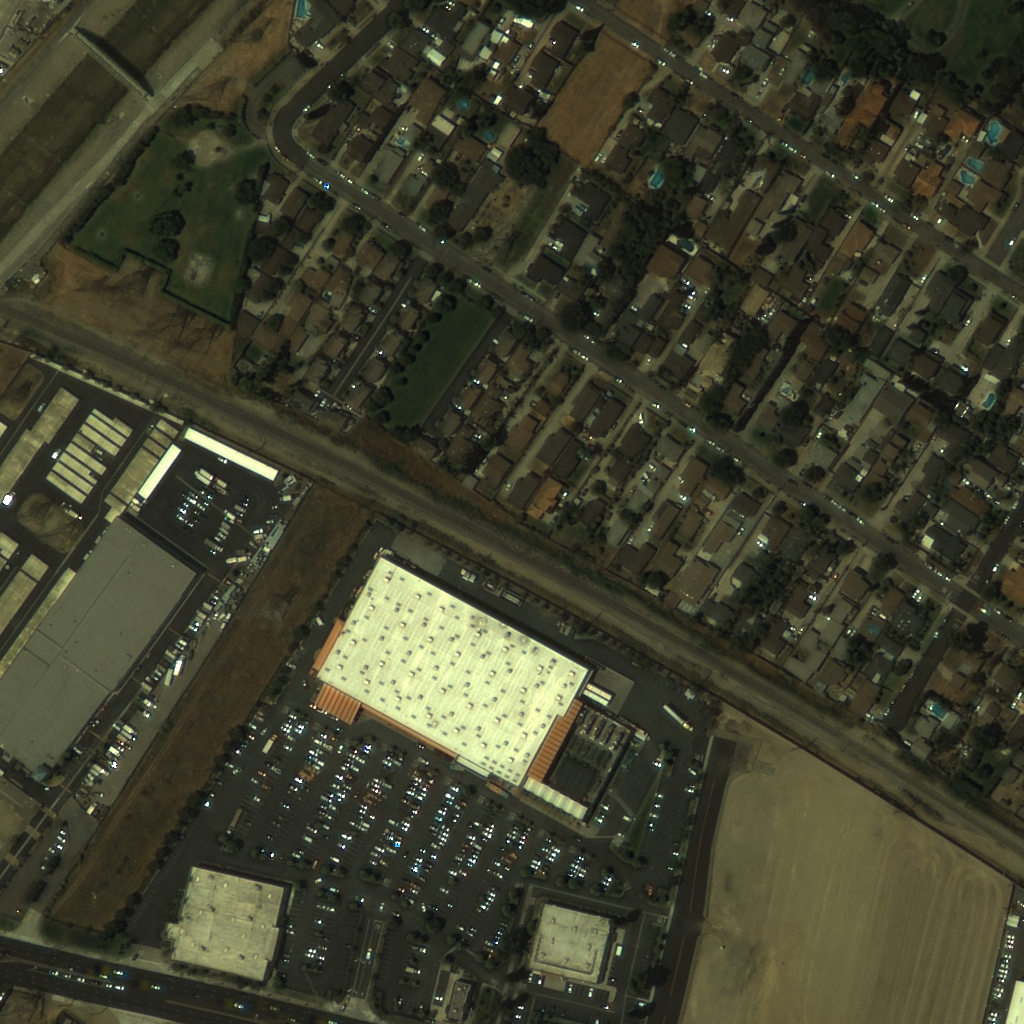

In [ ]:
# 10% 이하 cut
Image('/content/drive/MyDrive/SharedData/sia-satellite-data/Training/train_roads_data/BLD10541_PS3_K3A_NIA0389.png')

In [ ]:
count_90 = df_train_des[df_train_des['Road Ratio(%)'] >= 10.00]
count_90

file_name  Road Ratio(%)
0    BLD11258_PS3_K3A_NIA0390.txt          36.67
1    BLD00723_PS3_K3A_NIA0277.txt          32.28
2    BLD06880_PS3_K3A_NIA0382.txt          32.11
3    BLD00070_PS3_K3A_NIA0276.txt          31.84
4    BLD10411_PS3_K3A_NIA0388.txt          31.10
..                            ...            ...
570  BLD03684_PS3_K3A_NIA0376.txt          10.05
571  BLD01070_PS3_K3A_NIA0277.txt          10.05
572  BLD00356_PS3_K3A_NIA0276.txt          10.03
573  BLD01438_PS3_K3A_NIA0373.txt          10.02
574  BLD03042_PS3_K3A_NIA0375.txt          10.01

[575 rows x 2 columns]

In [ ]:
# csv파일로 저장
count_90.to_csv('/content/drive/MyDrive/SharedData/eda/road_ratio_90.csv', mode='w')

## 각 % 이하 이미지 개수가 전체에서 차지하는 비율

In [ ]:
print(' 3% 이하 이미지 비율 : {:.2f}%'.format(count_3.shape[0]/df_train.shape[0]*100))
print(' 6% 이하 이미지 비율 : {:.2f}%'.format(count_6.shape[0]/df_train.shape[0]*100))
print('10% 이하 이미지 비율 : {:.2f}%'.format(count_10.shape[0]/df_train.shape[0]*100))

 3% 이하 이미지 비율 : 21.59%
 6% 이하 이미지 비율 : 32.17%
10% 이하 이미지 비율 : 49.74%
